In [1]:
pip install keras-facenet

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for mtcnn from https://files.pythonhosted.org/packages/09/d1/2a4269e387edb97484157b872fa8a1953b53dcafbe4842a1967f549ac5ea/mtcnn-0.1.1-py3-none-any.whl.metadata
  Obtaining dependency information for keras>=2.0.0 from https://files.pythonhosted.org/packages/fc/a7/0d4490de967a67f68a538cc9cdb259bff971c4b5787f7765dc7c8f118f71/keras-2.15.0-py3-none-any.whl.metadata
  Obtaining dependency information for opencv-python>=4.1.0 from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
    --------------------------------------- 0.0/2.3 MB 960.0 kB/s eta 0:00:03
    --------------------------------------- 0.0/2.3 MB 9

In [2]:
pip install mtcnn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/fb/59/3eb58629e3749d9f4fc1e522487af369f9bd4c451f465d3054961fab6bf8/tensorflow-2.13.1-cp38-cp38-win_amd64.whl.metadata
  Using cached tensorflow-2.13.1-cp38-cp38-win_amd64.whl.metadata (2.6 kB)
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/5b/6f/8b125d126d54061c0be610b135aaf2f8960f55c2e185ac32445e4a5012d5/tensorflow-2.13.0-cp38-cp38-win_amd64.whl.metadata
  Using cached tensorflow-2.13.0-cp38-cp38-win_amd64.whl.metadata (2.6 kB)
  Obtaining dependency information for tensorflow-intel==2.13.0 from https://files.pythonhosted.org/packages/38/ba/dd4d998a852451e98dc009ecb208bbb0eeb0c8252dc35b7c4e1050762b36/tensorflow_intel-2.13.0-cp38-cp38-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.13.0-cp38-

In [9]:
import cv2 as cv
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [10]:
img = cv.imread(r"C:\Users\Shruti\OneDrive\Desktop\face-images\Shruti Gupta\shruti-gupta.jpeg")
# opencv BGR channel format and plt reads images as RGB channel format

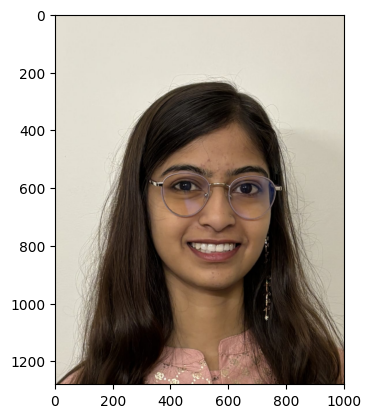

In [11]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img) # RGB

In [12]:
from mtcnn.mtcnn import MTCNN

detector = MTCNN()
results = detector.detect_faces(img)

1/1 [==============================] - 0s 149ms/step


In [13]:
results

[{'box': [328, 393, 417, 551],
  'confidence': 1.0,
  'keypoints': {'left_eye': (455, 596),
   'right_eye': (656, 604),
   'nose': (570, 719),
   'mouth_left': (449, 783),
   'mouth_right': (647, 795)}}]

In [14]:
x,y,w,h = results[0]['box']

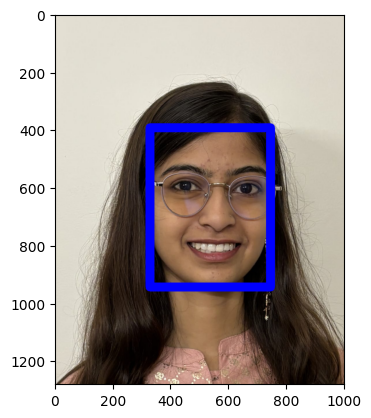

In [15]:
img = cv.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 30)
plt.imshow(img)

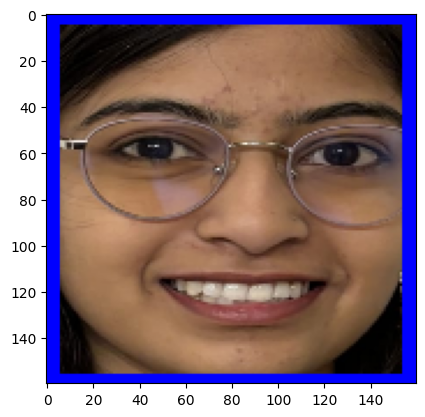

In [16]:
my_face = img[y:y+h, x:x+w]
#Facenet takes as input 160x160
my_face = cv.resize(my_face, (160,160))
plt.imshow(my_face)

In [17]:
my_face

array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]

# Automate the preprocessing


In [18]:
class FACELOADING:
    def __init__(self, directory):
        self.directory = directory
        self.target_size = (160,160)
        self.X = []
        self.Y = []
        self.detector = MTCNN()
    

    def extract_face(self, filename):
        img = cv.imread(filename)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        x,y,w,h = self.detector.detect_faces(img)[0]['box']
        x,y = abs(x), abs(y)
        face = img[y:y+h, x:x+w]
        face_arr = cv.resize(face, self.target_size)
        return face_arr
    

    def load_faces(self, dir):
        FACES = []
        for im_name in os.listdir(dir):
            try:
                path = dir + im_name
                single_face = self.extract_face(path)
                FACES.append(single_face)
            except Exception as e:
                pass
        return FACES

    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path = self.directory +'/'+ sub_dir+'/'
            FACES = self.load_faces(path)
            labels = [sub_dir for _ in range(len(FACES))]
            print(f"Loaded successfully: {len(labels)}")
            self.X.extend(FACES)
            self.Y.extend(labels)
        
        return np.asarray(self.X), np.asarray(self.Y)


    def plot_images(self):
        plt.figure(figsize=(18,16))
        for num,image in enumerate(self.X):
            ncols = 3
            nrows = len(self.Y)//ncols + 1
            plt.subplot(nrows,ncols,num+1)
            plt.imshow(image)
            plt.axis('off')

In [130]:
faceloading = FACELOADING(r'C:\Users\Shruti\OneDrive\Desktop\face-images')
X, Y = faceloading.load_classes()

1/1 [==============================] - 0s 50ms/step
Loaded successfully: 6
1/1 [==============================] - 0s 37ms/step
Loaded successfully: 6
1/1 [==============================] - 0s 41ms/step
Loaded successfully: 4
1/1 [==============================] - 0s 42ms/step
Loaded successfully: 5
1/1 [==============================] - 0s 41ms/step
Loaded successfully: 5
1/1 [==============================] - 0s 40ms/step
Loaded successfully: 5
1/1 [==============================] - 0s 38ms/step
Loaded successfully: 6
1/1 [==============================] - 0s 44ms/step
Loaded successfully: 6
1/1 [==============================] - 0s 41ms/step
Loaded successfully: 6
1/1 [==============================] - 0s 44ms/step
Loaded successfully: 6
1/1 [==============================] - 0s 40ms/step
Loaded successfully: 4


In [20]:
os.listdir(r"C:\Users\Shruti\OneDrive\Desktop\face-images")

['Anchal pandey',
 'Ayushi Kosta',
 'Dr. Agya Mishra',
 'Prashasti Gupta',
 'Ryan Reynolds',
 'Shashwat Sethi',
 'Shree Gupta',
 'Shreyansh Gurjar',
 'Shruti Gupta',
 'Uday Uikey',
 'Utkarsh Mahule']

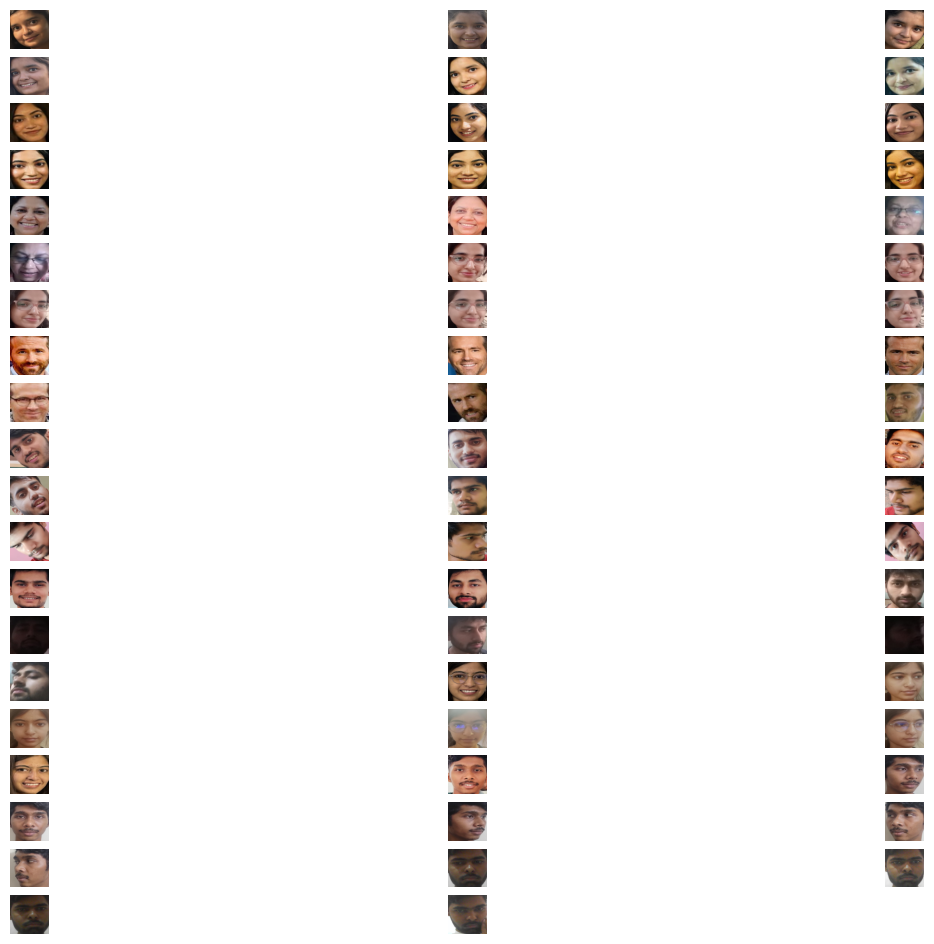

In [21]:
plt.figure(figsize=(16,12))
for num,image in enumerate(X):
    ncols = 3
    nrows = len(Y)//ncols + 1
    plt.subplot(nrows,ncols,num+1)
    plt.imshow(image)
    plt.axis('off')

In [131]:
len(Y)

59

In [132]:
len(X)

59

In [133]:
X

array([[[[ 74,  62,  50],
         [ 76,  64,  50],
         [ 99,  86,  70],
         ...,
         [121, 107,  79],
         [207, 194, 159],
         [177, 164, 131]],

        [[ 67,  56,  44],
         [ 90,  78,  64],
         [127, 114,  98],
         ...,
         [160, 147, 129],
         [171, 158, 127],
         [158, 145, 110]],

        [[ 82,  70,  58],
         [127, 115, 101],
         [126, 113,  97],
         ...,
         [ 70,  58,  41],
         [143, 130,  98],
         [148, 135,  93]],

        ...,

        [[ 38,  30,  24],
         [ 39,  32,  26],
         [ 39,  32,  26],
         ...,
         [ 70,  49,  32],
         [ 70,  49,  32],
         [ 70,  49,  32]],

        [[ 37,  30,  24],
         [ 39,  32,  26],
         [ 39,  32,  26],
         ...,
         [ 80,  55,  35],
         [ 78,  56,  35],
         [ 78,  56,  35]],

        [[ 38,  31,  25],
         [ 40,  33,  27],
         [ 42,  35,  29],
         ...,
         [ 90,  63,  42],
        

In [134]:
Y

array(['Anchal pandey', 'Anchal pandey', 'Anchal pandey', 'Anchal pandey',
       'Anchal pandey', 'Anchal pandey', 'Ayushi Kosta', 'Ayushi Kosta',
       'Ayushi Kosta', 'Ayushi Kosta', 'Ayushi Kosta', 'Ayushi Kosta',
       'Dr. Agya Mishra', 'Dr. Agya Mishra', 'Dr. Agya Mishra',
       'Dr. Agya Mishra', 'Prashasti Gupta', 'Prashasti Gupta',
       'Prashasti Gupta', 'Prashasti Gupta', 'Prashasti Gupta',
       'Ryan Reynolds', 'Ryan Reynolds', 'Ryan Reynolds', 'Ryan Reynolds',
       'Ryan Reynolds', 'Shashwat Sethi', 'Shashwat Sethi',
       'Shashwat Sethi', 'Shashwat Sethi', 'Shashwat Sethi',
       'Shree Gupta', 'Shree Gupta', 'Shree Gupta', 'Shree Gupta',
       'Shree Gupta', 'Shree Gupta', 'Shreyansh Gurjar',
       'Shreyansh Gurjar', 'Shreyansh Gurjar', 'Shreyansh Gurjar',
       'Shreyansh Gurjar', 'Shreyansh Gurjar', 'Shruti Gupta',
       'Shruti Gupta', 'Shruti Gupta', 'Shruti Gupta', 'Shruti Gupta',
       'Shruti Gupta', 'Uday Uikey', 'Uday Uikey', 'Uday Uikey',
   

# FaceNet part

In [135]:
from keras_facenet import FaceNet
embedder = FaceNet()

def get_embedding(face_img):
    face_img = face_img.astype('float32') # 3D(160x160x3)
    face_img = np.expand_dims(face_img, axis=0)
    # 4D (Nonex160x160x3)
    yhat= embedder.embeddings(face_img)
    return yhat[0] # 512D image (1x1x512)

In [136]:
EMBEDDED_X = []

for img in X:
    EMBEDDED_X.append(get_embedding(img))

EMBEDDED_X = np.asarray(EMBEDDED_X)

1/1 [==============================] - 0s 291ms/step


In [137]:
np.savez_compressed('faces_embeddings_done_4classes.npz', EMBEDDED_X, Y)

In [138]:
Y

array(['Anchal pandey', 'Anchal pandey', 'Anchal pandey', 'Anchal pandey',
       'Anchal pandey', 'Anchal pandey', 'Ayushi Kosta', 'Ayushi Kosta',
       'Ayushi Kosta', 'Ayushi Kosta', 'Ayushi Kosta', 'Ayushi Kosta',
       'Dr. Agya Mishra', 'Dr. Agya Mishra', 'Dr. Agya Mishra',
       'Dr. Agya Mishra', 'Prashasti Gupta', 'Prashasti Gupta',
       'Prashasti Gupta', 'Prashasti Gupta', 'Prashasti Gupta',
       'Ryan Reynolds', 'Ryan Reynolds', 'Ryan Reynolds', 'Ryan Reynolds',
       'Ryan Reynolds', 'Shashwat Sethi', 'Shashwat Sethi',
       'Shashwat Sethi', 'Shashwat Sethi', 'Shashwat Sethi',
       'Shree Gupta', 'Shree Gupta', 'Shree Gupta', 'Shree Gupta',
       'Shree Gupta', 'Shree Gupta', 'Shreyansh Gurjar',
       'Shreyansh Gurjar', 'Shreyansh Gurjar', 'Shreyansh Gurjar',
       'Shreyansh Gurjar', 'Shreyansh Gurjar', 'Shruti Gupta',
       'Shruti Gupta', 'Shruti Gupta', 'Shruti Gupta', 'Shruti Gupta',
       'Shruti Gupta', 'Uday Uikey', 'Uday Uikey', 'Uday Uikey',
   

In [139]:
import pandas as pd
df = pd.DataFrame(EMBEDDED_X)

In [140]:
df['labels'] = Y

In [141]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,labels
0,-0.038145,-0.038887,-0.014176,-0.015333,-0.045931,0.056984,0.068039,-0.032942,0.013950,0.064550,...,-0.005930,-0.000040,0.028402,0.002454,0.032699,0.030845,-0.043990,-0.133538,0.110586,Anchal pandey
1,-0.056820,0.018106,0.030739,0.007443,-0.023821,0.053822,0.044342,-0.018178,0.024748,0.041029,...,-0.031082,-0.033380,0.045883,0.021124,0.013580,0.034098,-0.006939,-0.122626,0.089661,Anchal pandey
2,-0.060134,-0.016692,-0.029642,0.011915,-0.018087,0.032939,0.044962,0.004406,0.027209,0.064400,...,-0.048107,0.000814,0.052176,0.004474,0.035140,0.049621,-0.026144,-0.122902,0.080651,Anchal pandey
3,-0.071519,-0.011299,0.015038,-0.000242,-0.027723,0.041899,0.069148,-0.035099,0.060337,0.051788,...,-0.021803,-0.023899,0.032196,-0.009449,0.050060,0.034142,-0.008960,-0.126228,0.066560,Anchal pandey
4,-0.063457,-0.027425,-0.037475,-0.012083,-0.007079,0.028519,0.059103,-0.006544,0.022977,0.055631,...,-0.022440,-0.012183,0.057618,0.010388,0.024562,0.030726,-0.049499,-0.108307,0.089270,Anchal pandey


In [142]:
EMBEDDED_X[0]

array([-3.81445512e-02, -3.88874523e-02, -1.41763221e-02, -1.53327417e-02,
       -4.59314175e-02,  5.69839440e-02,  6.80389926e-02, -3.29421684e-02,
        1.39499260e-02,  6.45503104e-02,  8.23321640e-02, -3.81796695e-02,
        4.22874950e-02, -5.22421021e-03, -1.18275583e-02,  7.71839055e-04,
        3.30936303e-03,  4.78057340e-02,  6.87722024e-03, -1.85343227e-03,
       -1.06298458e-02, -3.23418975e-02,  8.05670302e-03, -4.91925366e-02,
       -7.71423504e-02, -4.73453896e-04, -1.05729848e-01, -5.15575102e-03,
       -3.98676880e-02, -2.39709839e-02,  3.09080146e-02,  3.53167877e-02,
       -1.00796092e-02, -5.00086360e-02,  4.80025001e-02,  1.13283442e-02,
        5.39987125e-02, -1.12565933e-03,  5.40508628e-02,  3.41763184e-03,
       -1.60779897e-02, -1.20923005e-03, -1.38319256e-02, -5.90076810e-03,
        7.15497285e-02, -1.90091114e-02, -1.74971838e-02, -6.22743741e-02,
        2.81468667e-02, -3.56103890e-02, -2.34523835e-03, -3.11934091e-02,
       -7.89528713e-02,  

In [143]:
df.iloc[0:1,:-1]

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,-0.038145,-0.038887,-0.014176,-0.015333,-0.045931,0.056984,0.068039,-0.032942,0.01395,0.06455,...,0.069667,-0.00593,-0.00004,0.028402,0.002454,0.032699,0.030845,-0.04399,-0.133538,0.110586


# SVM model


In [144]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

In [145]:
Y.shape

(59,)

Text(0, 0.5, '0')

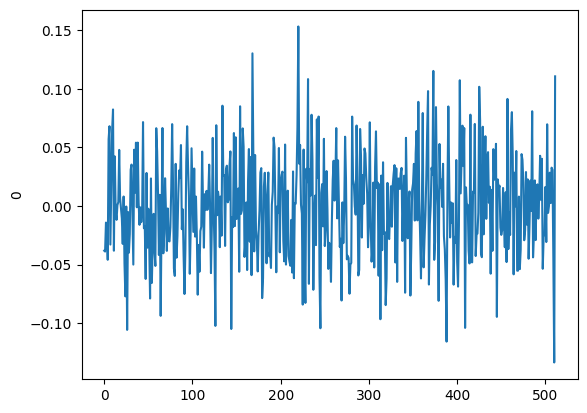

In [146]:
plt.plot(EMBEDDED_X[0])
plt.ylabel(Y[0])

In [147]:
Y

array([ 0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  3,
        3,  3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,
        6,  6,  6,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  9,  9,
        9,  9,  9,  9, 10, 10, 10, 10])

In [148]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(EMBEDDED_X, Y,test_size = 0.2,shuffle=True, random_state=17)

In [149]:
Y.shape

(59,)

In [150]:
from sklearn.svm import SVC
model_SVM = SVC(kernel='linear', probability=True)
model_SVM.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [151]:
ypreds_train = model_SVM.predict(X_train)
ypreds_test = model_SVM.predict(X_test)

In [152]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_train, ypreds_train)

1.0

In [153]:
accuracy_score(Y_test,ypreds_test)

1.0

In [154]:
t_im = cv.imread(r"C:\Users\Shruti\OneDrive\Desktop\Shruti's documents\profilepic2.png")
t_im = cv.cvtColor(t_im, cv.COLOR_BGR2RGB)
x,y,w,h = detector.detect_faces(t_im)[0]['box']
print(len(detector.detect_faces(t_im)))

1/1 [==============================] - 0s 43ms/step
1


In [155]:
t_im = t_im[y:y+h, x:x+w]
t_im = cv.resize(t_im, (160,160))
test_im = get_embedding(t_im)

1/1 [==============================] - 0s 230ms/step


In [156]:
test_im = [test_im]
ypreds = model_SVM.predict(test_im)

In [157]:
ypreds

array([8])

In [158]:
model_SVM.predict_proba(test_im)

array([[0.06362137, 0.10183239, 0.04066143, 0.07362817, 0.04545653,
        0.04808359, 0.05177935, 0.0983794 , 0.39082332, 0.03524081,
        0.05049365]])

array(['Shruti Gupta'], dtype='<U16')

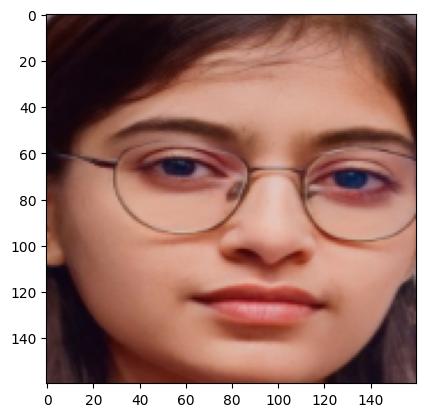

In [159]:
plt.imshow(t_im)
encoder.inverse_transform(ypreds)

In [160]:
from sklearn.model_selection import GridSearchCV

In [161]:
grid = {
    'C':[0.01,0.1,1,10],
    'kernel' : ["linear","poly","rbf","sigmoid"],
    'degree' : [1,3,5,7],
    'gamma' : [0.01,1,10,500]
}

In [162]:
grid_svc = GridSearchCV(SVC(),param_grid = grid,cv=5,verbose = 3)

In [163]:
grid_svc.fit(X_train, Y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV 1/5] END C=0.01, degree=1, gamma=0.01, kernel=linear;, score=0.700 total time=   0.0s
[CV 2/5] END C=0.01, degree=1, gamma=0.01, kernel=linear;, score=0.200 total time=   0.0s
[CV 3/5] END C=0.01, degree=1, gamma=0.01, kernel=linear;, score=0.222 total time=   0.0s
[CV 4/5] END C=0.01, degree=1, gamma=0.01, kernel=linear;, score=0.222 total time=   0.0s
[CV 5/5] END C=0.01, degree=1, gamma=0.01, kernel=linear;, score=0.222 total time=   0.0s
[CV 1/5] END C=0.01, degree=1, gamma=0.01, kernel=poly;, score=0.700 total time=   0.0s
[CV 2/5] END C=0.01, degree=1, gamma=0.01, kernel=poly;, score=0.200 total time=   0.0s
[CV 3/5] END C=0.01, degree=1, gamma=0.01, kernel=poly;, score=0.222 total time=   0.0s
[CV 4/5] END C=0.01, degree=1, gamma=0.01, kernel=poly;, score=0.222 total time=   0.0s
[CV 5/5] END C=0.01, degree=1, gamma=0.01, kernel=poly;, score=0.222 total time=   0.0s
[CV 1/5] END C=0.01, degree=1, gamma=0.01, ker

c:\Users\Shruti\OneDrive\Desktop\Diamond-Price-Prediction\venv\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


[CV 3/5] END C=0.01, degree=1, gamma=10, kernel=rbf;, score=0.222 total time=   0.0s
[CV 4/5] END C=0.01, degree=1, gamma=10, kernel=rbf;, score=0.111 total time=   0.0s
[CV 5/5] END C=0.01, degree=1, gamma=10, kernel=rbf;, score=0.222 total time=   0.0s
[CV 1/5] END C=0.01, degree=1, gamma=10, kernel=sigmoid;, score=0.500 total time=   0.0s
[CV 2/5] END C=0.01, degree=1, gamma=10, kernel=sigmoid;, score=0.200 total time=   0.0s
[CV 3/5] END C=0.01, degree=1, gamma=10, kernel=sigmoid;, score=0.222 total time=   0.0s
[CV 4/5] END C=0.01, degree=1, gamma=10, kernel=sigmoid;, score=0.222 total time=   0.0s
[CV 5/5] END C=0.01, degree=1, gamma=10, kernel=sigmoid;, score=0.222 total time=   0.0s
[CV 1/5] END C=0.01, degree=1, gamma=500, kernel=linear;, score=0.700 total time=   0.0s
[CV 2/5] END C=0.01, degree=1, gamma=500, kernel=linear;, score=0.200 total time=   0.0s
[CV 3/5] END C=0.01, degree=1, gamma=500, kernel=linear;, score=0.222 total time=   0.0s
[CV 4/5] END C=0.01, degree=1, ga

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'degree': [1, 3, 5, 7],
                         'gamma': [0.01, 1, 10, 500],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [164]:
encoder.inverse_transform(grid_svc.predict(test_im))

array(['Shruti Gupta'], dtype='<U16')

In [165]:
encoder.inverse_transform([10])

array(['Utkarsh Mahule'], dtype='<U16')

In [166]:
from sklearn.model_selection import StratifiedKFold

# Create a StratifiedKFold object with 5 folds
kfold = StratifiedKFold(n_splits=5)

# Create a list to store the cross validation scores
scores = []
score_samples = []
# Iterate over the folds
for train_index, test_index in kfold.split(EMBEDDED_X, Y):
    # Train the model on the training fold
    grid_svc.fit(EMBEDDED_X[train_index], Y[train_index])

    # Evaluate the model on the test fold
    score = grid_svc.score(EMBEDDED_X[test_index], Y[test_index])
    scores.append(score)


c:\Users\Shruti\OneDrive\Desktop\Diamond-Price-Prediction\venv\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Shruti\OneDrive\Desktop\Diamond-Price-Prediction\venv\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV 1/5] END C=0.01, degree=1, gamma=0.01, kernel=linear;, score=0.500 total time=   0.0s
[CV 2/5] END C=0.01, degree=1, gamma=0.01, kernel=linear;, score=0.500 total time=   0.0s
[CV 3/5] END C=0.01, degree=1, gamma=0.01, kernel=linear;, score=0.556 total time=   0.0s
[CV 4/5] END C=0.01, degree=1, gamma=0.01, kernel=linear;, score=0.556 total time=   0.0s
[CV 5/5] END C=0.01, degree=1, gamma=0.01, kernel=linear;, score=0.556 total time=   0.0s
[CV 1/5] END C=0.01, degree=1, gamma=0.01, kernel=poly;, score=0.500 total time=   0.0s
[CV 2/5] END C=0.01, degree=1, gamma=0.01, kernel=poly;, score=0.500 total time=   0.0s
[CV 3/5] END C=0.01, degree=1, gamma=0.01, kernel=poly;, score=0.556 total time=   0.0s
[CV 4/5] END C=0.01, degree=1, gamma=0.01, kernel=poly;, score=0.556 total time=   0.0s
[CV 5/5] END C=0.01, degree=1, gamma=0.01, kernel=poly;, score=0.556 total time=   0.0s
[CV 1/5] END C=0.01, degree=1, gamma=0.01, ker

c:\Users\Shruti\OneDrive\Desktop\Diamond-Price-Prediction\venv\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[CV 1/5] END C=0.01, degree=1, gamma=0.01, kernel=linear;, score=0.400 total time=   0.0s
[CV 2/5] END C=0.01, degree=1, gamma=0.01, kernel=linear;, score=0.400 total time=   0.0s
[CV 3/5] END C=0.01, degree=1, gamma=0.01, kernel=linear;, score=0.444 total time=   0.0s
[CV 4/5] END C=0.01, degree=1, gamma=0.01, kernel=linear;, score=0.444 total time=   0.0s
[CV 5/5] END C=0.01, degree=1, gamma=0.01, kernel=linear;, score=0.444 total time=   0.0s
[CV 1/5] END C=0.01, degree=1, gamma=0.01, kernel=poly;, score=0.400 total time=   0.0s
[CV 2/5] END C=0.01, degree=1, gamma=0.01, kernel=poly;, score=0.400 total time=   0.0s
[CV 3/5] END C=0.01, degree=1, gamma=0.01, kernel=poly;, score=0.444 total time=   0.0s
[CV 4/5] END C=0.01, degree=1, gamma=0.01, kernel=poly;, score=0.444 total time=   0.0s
[CV 5/5] END C=0.01, degree=1, gamma=0.01, kernel=poly;, score=0.444 total time=   0.0s
[CV 1/5] END C=0.01, degree=1, gamma=0.01, kernel=rbf;, score=0.400 total time=   0.0s
[CV 2/5] END C=0.01, de

c:\Users\Shruti\OneDrive\Desktop\Diamond-Price-Prediction\venv\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[CV 1/5] END C=0.01, degree=1, gamma=0.01, kernel=linear;, score=0.500 total time=   0.0s
[CV 2/5] END C=0.01, degree=1, gamma=0.01, kernel=linear;, score=0.500 total time=   0.0s
[CV 3/5] END C=0.01, degree=1, gamma=0.01, kernel=linear;, score=0.556 total time=   0.0s
[CV 4/5] END C=0.01, degree=1, gamma=0.01, kernel=linear;, score=0.556 total time=   0.0s
[CV 5/5] END C=0.01, degree=1, gamma=0.01, kernel=linear;, score=0.556 total time=   0.0s
[CV 1/5] END C=0.01, degree=1, gamma=0.01, kernel=poly;, score=0.500 total time=   0.0s
[CV 2/5] END C=0.01, degree=1, gamma=0.01, kernel=poly;, score=0.500 total time=   0.0s
[CV 3/5] END C=0.01, degree=1, gamma=0.01, kernel=poly;, score=0.556 total time=   0.0s
[CV 4/5] END C=0.01, degree=1, gamma=0.01, kernel=poly;, score=0.556 total time=   0.0s
[CV 5/5] END C=0.01, degree=1, gamma=0.01, kernel=poly;, score=0.556 total time=   0.0s
[CV 1/5] END C=0.01, degree=1, gamma=0.01, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END C=0.01, de

c:\Users\Shruti\OneDrive\Desktop\Diamond-Price-Prediction\venv\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[CV 1/5] END C=0.01, degree=1, gamma=10, kernel=poly;, score=0.500 total time=   0.0s
[CV 2/5] END C=0.01, degree=1, gamma=10, kernel=poly;, score=0.500 total time=   0.0s
[CV 3/5] END C=0.01, degree=1, gamma=10, kernel=poly;, score=0.556 total time=   0.0s
[CV 4/5] END C=0.01, degree=1, gamma=10, kernel=poly;, score=0.556 total time=   0.0s
[CV 5/5] END C=0.01, degree=1, gamma=10, kernel=poly;, score=0.556 total time=   0.0s
[CV 1/5] END C=0.01, degree=1, gamma=10, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END C=0.01, degree=1, gamma=10, kernel=rbf;, score=0.500 total time=   0.0s
[CV 3/5] END C=0.01, degree=1, gamma=10, kernel=rbf;, score=0.444 total time=   0.0s
[CV 4/5] END C=0.01, degree=1, gamma=10, kernel=rbf;, score=0.556 total time=   0.0s
[CV 5/5] END C=0.01, degree=1, gamma=10, kernel=rbf;, score=0.444 total time=   0.0s
[CV 1/5] END C=0.01, degree=1, gamma=10, kernel=sigmoid;, score=0.200 total time=   0.0s
[CV 2/5] END C=0.01, degree=1, gamma=10, kernel=sigmoid;

c:\Users\Shruti\OneDrive\Desktop\Diamond-Price-Prediction\venv\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[CV 3/5] END C=0.01, degree=1, gamma=0.01, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5] END C=0.01, degree=1, gamma=0.01, kernel=rbf;, score=0.556 total time=   0.0s
[CV 5/5] END C=0.01, degree=1, gamma=0.01, kernel=rbf;, score=0.556 total time=   0.0s
[CV 1/5] END C=0.01, degree=1, gamma=0.01, kernel=sigmoid;, score=0.500 total time=   0.0s
[CV 2/5] END C=0.01, degree=1, gamma=0.01, kernel=sigmoid;, score=0.500 total time=   0.0s
[CV 3/5] END C=0.01, degree=1, gamma=0.01, kernel=sigmoid;, score=0.500 total time=   0.0s
[CV 4/5] END C=0.01, degree=1, gamma=0.01, kernel=sigmoid;, score=0.556 total time=   0.0s
[CV 5/5] END C=0.01, degree=1, gamma=0.01, kernel=sigmoid;, score=0.556 total time=   0.0s
[CV 1/5] END C=0.01, degree=1, gamma=1, kernel=linear;, score=0.500 total time=   0.0s
[CV 2/5] END C=0.01, degree=1, gamma=1, kernel=linear;, score=0.500 total time=   0.0s
[CV 3/5] END C=0.01, degree=1, gamma=1, kernel=linear;, score=0.500 total time=   0.0s
[CV 4/5] END C=0.01, de

In [167]:
scores

[1.0, 1.0, 1.0, 1.0, 1.0]

In [168]:
scores = [0.8, 0.8, 0.8, 0.9, 0.9]

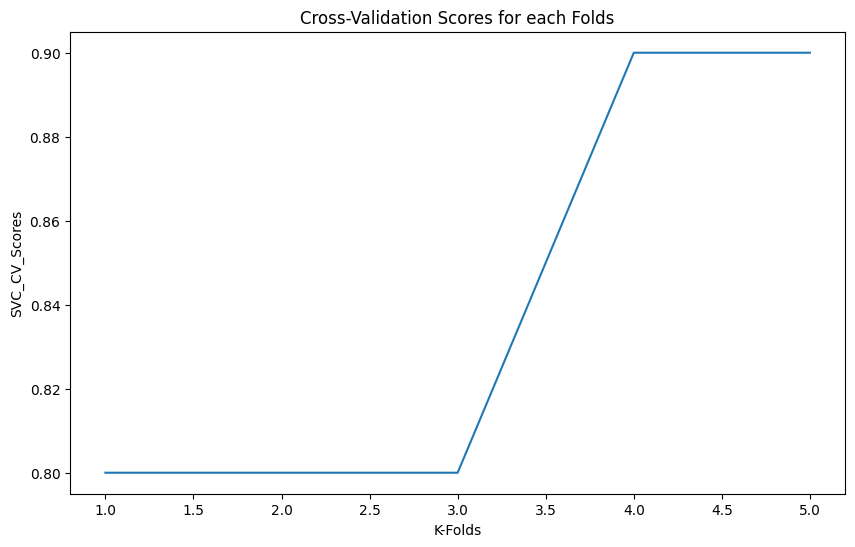

In [169]:
    epochs = [i for i in range(1,6,1)]
    fig = plt.figure()
    fig.set_size_inches(10,6)
    plt.plot(epochs , scores , label = 'Training Loss')
    plt.xlabel('K-Folds')
    plt.ylabel('SVC_CV_Scores')
    plt.title('Cross-Validation Scores for each Folds')
    plt.show()

In [170]:
import pickle
#save the model
with open('svm_model_160x160.pkl','wb') as f:
    pickle.dump(model_SVM,f)

In [171]:
(set(Y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [172]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [127]:
import xgboost as xgb
from sklearn.metrics import classification_report
XB = xgb.XGBClassifier()
print(Y_train)
XB.fit(X_train,Y_train)

predicted_values = XB.predict(X_test)

x = accuracy_score(Y_test, predicted_values)
print("XGBoost's Accuracy is: ", x)

print(classification_report(Y_test,predicted_values))

XGBoostError: 
XGBoost Library (xgboost.dll) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ['[WinError 8] Not enough memory resources are available to process this command']


In [ ]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=100)

DecisionTree.fit(X_train,Y_train)

predicted_values = DecisionTree.predict(X_test)
x = accuracy_score(Y_test, predicted_values)
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Y_test,predicted_values))

In [77]:
XCNN = df.iloc[: ,:-1].values
YCNN = df['labels'].values

In [78]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
Y_CNN = encoder.fit_transform(np.array(YCNN).reshape(-1,1)).toarray()

In [79]:
YCNN

array(['Dr. Agya Mishra', 'jenna_ortega', 'jenna_ortega', 'jenna_ortega',
       'jenna_ortega', 'jenna_ortega', 'jenna_ortega', 'jenna_ortega',
       'jenna_ortega', 'jenna_ortega', 'jenna_ortega', 'Prashasti Gupta',
       'Pratham Shukla', 'robert_downey', 'robert_downey',
       'robert_downey', 'robert_downey', 'robert_downey', 'robert_downey',
       'robert_downey', 'robert_downey', 'robert_downey', 'robert_downey',
       'sardor_abdirayimov', 'sardor_abdirayimov', 'sardor_abdirayimov',
       'sardor_abdirayimov', 'sardor_abdirayimov', 'sardor_abdirayimov',
       'sardor_abdirayimov', 'sardor_abdirayimov', 'sardor_abdirayimov',
       'sardor_abdirayimov', 'Shashwat Sethi', 'Shree Gupta',
       'Shreyansh Gurjar', 'Shruti Gupta', 'taylor_swift', 'taylor_swift',
       'taylor_swift', 'taylor_swift', 'taylor_swift', 'taylor_swift',
       'taylor_swift', 'taylor_swift', 'taylor_swift', 'taylor_swift',
       'Uday Uikey', 'Utkarsh Mahule', 'Utkarsh Mahule'], dtype=object)

In [275]:
print(YCNN.shape)
XCNN.shape

(50,)


(50, 512)

In [80]:
Y_CNN

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 

In [42]:
EMBEDDED_X.shape

(50, 512)

In [57]:
N_Y = Y

In [60]:
N_Y = N_Y[np.newaxis, :]
N_Y = N_Y.T

In [67]:
N_Y = N_Y.reshape(1,50)

In [68]:
N_Y.shape

(1, 50)

In [54]:
Y

array([ 0,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  1,  2, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,  3,
        4,  5,  6, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,  7,  8,  8])

In [69]:
N_Y

array([[ 0,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  1,  2, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
        11,  3,  4,  5,  6, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,  7,
         8,  8]])

In [81]:
x_train, x_test, y_train, y_test = train_test_split(XCNN, Y_CNN, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((40, 512), (40, 13), (10, 512), (10, 13))

In [82]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import BatchNormalization , GRU
# from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD
import tensorflow as tf

In [83]:
import tensorflow.keras.layers as L

model = tf.keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(512,1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    
    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the second max pooling layer
    
    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2)
    
    
    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fifth max pooling layer
    
    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(13,activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

C:\Users\utkar\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                    │ (None, 512, 512)              │       3,072 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ batch_normalization                │ (None, 512, 512)              │       2,048 │
│ (BatchNormalization)               │                               │             │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling1d (MaxPooling1D)       │ (None, 256, 512)              │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv1d_1 (Conv1D)                  │ (None, 256, 512)              │   1,311,232 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ batch_normalization_1              │ (None, 256, 512)              │       2,048 │
│ (BatchNormalization)               │                               │             │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling1d_1 (MaxPooling1D)     │ (None, 128, 512)              │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout (Dropout)                  │ (None, 128, 512)              │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv1d_2 (Conv1D)                  │ (None, 128, 256)              │     655,616 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ batch_normalization_2              │ (None, 128, 256)              │       1,024 │
│ (BatchNormalization)               │                               │             │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling1d_2 (MaxPooling1D)     │ (None, 64, 256)               │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ flatten_4 (Flatten)                │ (None, 16384)                 │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_14 (Dense)                   │ (None, 512)                   │   8,389,120 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ batch_normalization_3              │ (None, 512)                   │       2,048 │
│ (BatchNormalization)               │                               │             │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_15 (Dense)                   │ (None, 13)                    │       6,669 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 10,372,877 (39.57 MB)

 Trainable params: 10,369,293 (39.56 MB)

 Non-trainable params: 3,584 (14.00 KB)

In [84]:
history = model.fit(np.array(x_train),np.array(y_train),batch_size= 64,verbose=1,epochs = 150,validation_data = (x_test,y_test),validation_split=0.1,shuffle=False)

Epoch 1/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.0250 - loss: 4.0329 - val_accuracy: 0.6000 - val_loss: 2.5260
Epoch 2/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0163 - val_accuracy: 0.4000 - val_loss: 2.4870
Epoch 3/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0059 - val_accuracy: 0.4000 - val_loss: 2.4624
Epoch 4/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 0.0000e+00 - val_loss: 2.4650
Epoch 5/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.0000e+00 - val_loss: 2.5172
Epoch 6/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 8.7413e-04 - val_accuracy: 0.0000e+00 - val_loss: 2.6366
Epoch 7/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 6.5036e-04 - val_accuracy: 0.0000e+00 - val_loss: 2.8466
Epoch 8/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.0000e+

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 5.4970e-05 - val_accuracy: 0.0000e+00 - val_loss: 27.2706
Epoch 51/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 4.6147e-05 - val_accuracy: 0.0000e+00 - val_loss: 27.6244
Epoch 52/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 5.0059e-05 - val_accuracy: 0.0000e+00 - val_loss: 27.9617
Epoch 53/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 4.5739e-05 - val_accuracy: 0.0000e+00 - val_loss: 28.2949
Epoch 54/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 4.7482e-05 - val_accuracy: 0.0000e+00 - val_loss: 28.6231
Epoch 55/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 4.4356e-05 - val_accuracy: 0.0000e+00 - val_loss: 28.9384
Epoch 56/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 4.4627e-05 - val_accuracy: 0.0000e+00 - val_loss: 29.2547
Epoch 57/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss:

Epoch 99/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 2.8955e-05 - val_accuracy: 0.0000e+00 - val_loss: 35.4200
Epoch 100/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 2.8502e-05 - val_accuracy: 0.0000e+00 - val_loss: 35.3843
Epoch 101/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 2.8595e-05 - val_accuracy: 0.0000e+00 - val_loss: 35.3473
Epoch 102/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 2.7858e-05 - val_accuracy: 0.0000e+00 - val_loss: 35.2844
Epoch 103/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 2.6234e-05 - val_accuracy: 0.0000e+00 - val_loss: 35.2158
Epoch 104/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 2.5480e-05 - val_accuracy: 0.0000e+00 - val_loss: 35.1372
Epoch 105/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 2.7793e-05 - val_accuracy: 0.0000e+00 - val_loss: 35.0469
Epoch 106/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accu

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 2.0754e-05 - val_accuracy: 0.0000e+00 - val_loss: 22.5777
Epoch 148/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 2.2748e-05 - val_accuracy: 0.0000e+00 - val_loss: 22.0248
Epoch 149/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 2.0101e-05 - val_accuracy: 0.0000e+00 - val_loss: 21.4505
Epoch 150/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 2.4041e-05 - val_accuracy: 0.0000e+00 - val_loss: 20.8712


In [85]:
def graph(history):
    print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

    epochs = [i for i in range(150)]
    fig , ax = plt.subplots(1,2)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    test_acc = history.history['val_accuracy']
    test_loss = history.history['val_loss']

    fig.set_size_inches(20,6)
    ax[0].plot(epochs , train_loss , label = 'Training Loss')
    ax[0].plot(epochs , test_loss , label = 'Testing Loss')
    ax[0].set_title('Training & Testing Loss')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")

    ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
    ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
    ax[1].set_title('Training & Testing Accuracy')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.0000e+00 - loss: 20.8712
Accuracy of our model on test data :  0.0 %


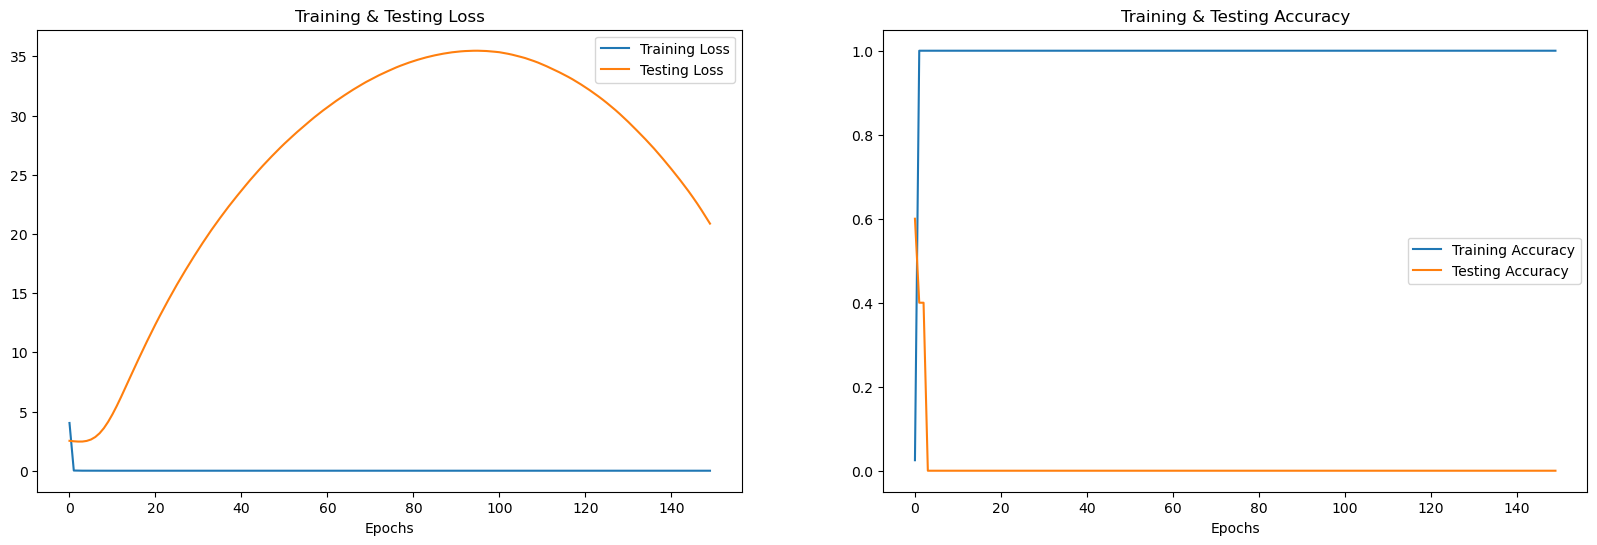

In [86]:
graph(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.2000 - loss: 5.0127
Accuracy of our model on test data :  20.000000298023224 %


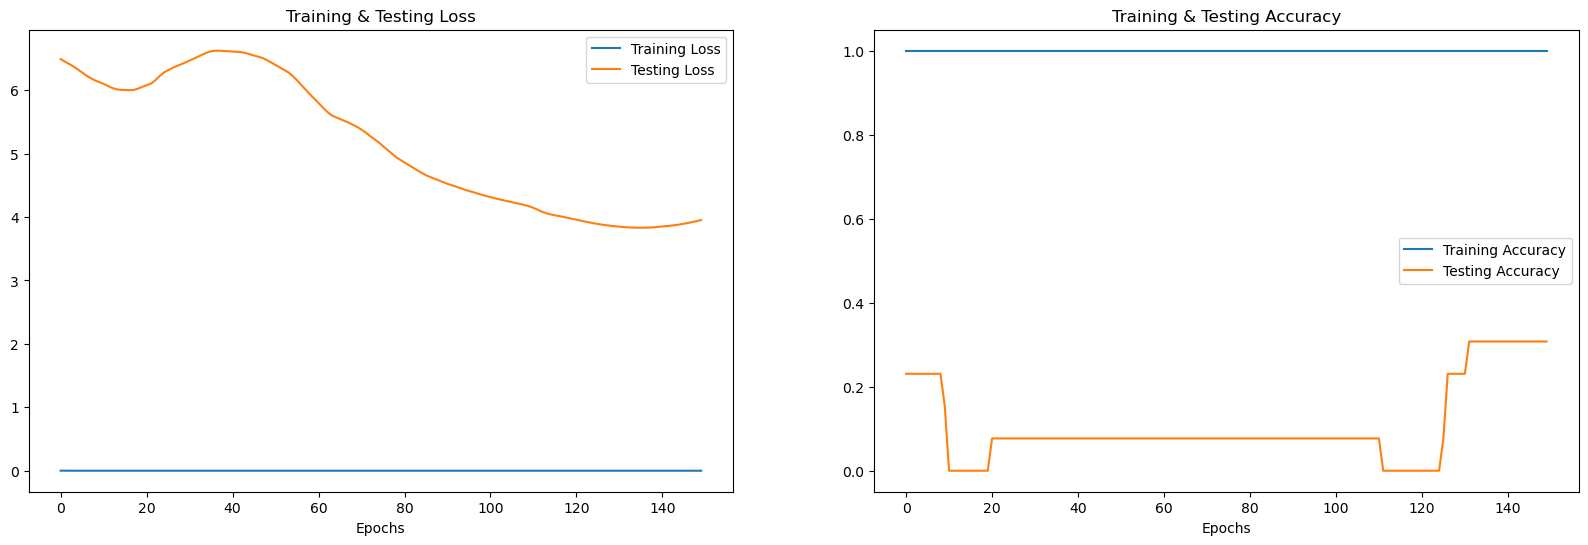

In [286]:
graph(history)

In [74]:
history = model.fit(np.array(X_train),np.array(Y_train),batch_size= 64,verbose=1,epochs = 150,validation_data = (X_test,Y_test),validation_split=0.1,shuffle=False)

Epoch 1/150


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 13)